In [1]:
import os
from matplotlib import pyplot as plt
from PIL import Image #Procesamiento Digital de IMágenes
import numpy as np

# 1.Dataset

In [2]:
if not os.path.exists('lfwcrop_grey'):
    !wget http://conradsanderson.id.au/lfwcrop/lfwcrop_grey.zip
    !unzip 'lfwcrop_grey.zip'

filenames = []
images = []

for filename in os.listdir('lfwcrop_grey/faces'):
    filenames.append(filename)
    image = np.array(Image.open(os.path.join('lfwcrop_grey/faces', filename)))
    images.append(image)

images = np.array(images)

print('Total Number of Faces: {}'.format(len(images)))
print(images.shape)
n = 64*64 #dimensión de mis datos (original) n = 4096 features
X = images.reshape(13233, n) # m = 13233 ejemplos de entrenamiento
print(X.shape)


Total Number of Faces: 13233
(13233, 64, 64)
(13233, 4096)


# 2.Visualización del Dataset

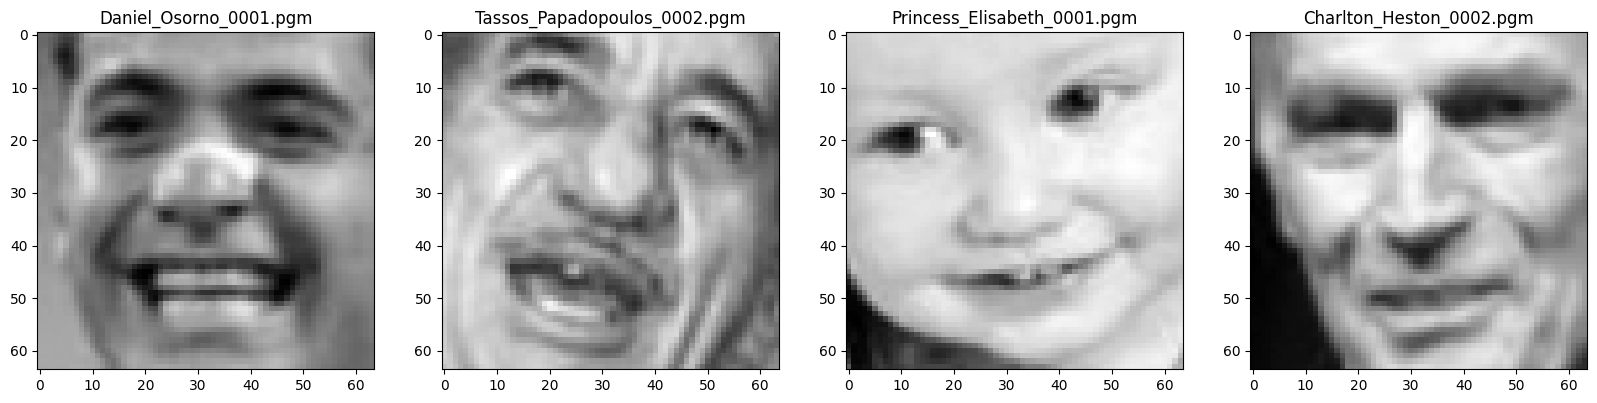

In [3]:
plt.figure(figsize=(20, 10))
num_images = 4
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    index = np.random.choice(range(len(images)))
    image = images[index]
    filename=filenames[index]
    plt.imshow(image, 'gray')
    plt.title(filename)

# 3.Compresión de imágenes de rostros con PCA

In [4]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
explained_variance = 0.95 #varianza retenida =  varianza explicada = "información" retenida
pca = PCA(explained_variance) #solo construyo el objeto pca
pca.fit(X) #Implementa [U, S, V] = svd(Sigma); Ureduce = U(:,1:k) (ver diapositvas). Selecciona automáticamente k de modo que se retenga 99% de la varianza . Fit solo se hace en el training set.
#puede demorar unos minutos

PCA(n_components=0.95)

In [5]:
z = pca.transform(X) # Implementa z = Ureduce'*x (ver diapositivas). En algebra lineal Ureduce o U son matrices de rotación. ESTA ES LA PARTE DE PROYECCIÓN
Ureduce = pca.components_.T #Ureduce nxk
K = pca.n_components_ #número de componentes correspondientes a la varianza retenida
print("Los datos originales tienen dimensión", X.shape)
print("Los datos comprimidos tienen dimensión", z.shape)
print("El número de componentes principales K es", K, " que retienen el ", explained_variance*100, "% de la varianza")
print("El tam. de Ureduce (matriz de eigenvectors) es", Ureduce.shape)
print("PCA consigue reducir el tamaño en disco al ", K/n*100, "% de su tam. original")

Los datos originales tienen dimensión (13233, 4096)
Los datos comprimidos tienen dimensión (13233, 180)
El número de componentes principales K es 180  que retienen el  95.0 % de la varianza
El tam. de Ureduce (matriz de eigenvectors) es (4096, 180)
PCA consigue reducir el tamaño en disco al  4.39453125 % de su tam. original


# 4.Visualizando los eigenvectors (Ureduce-> EigenFaces)

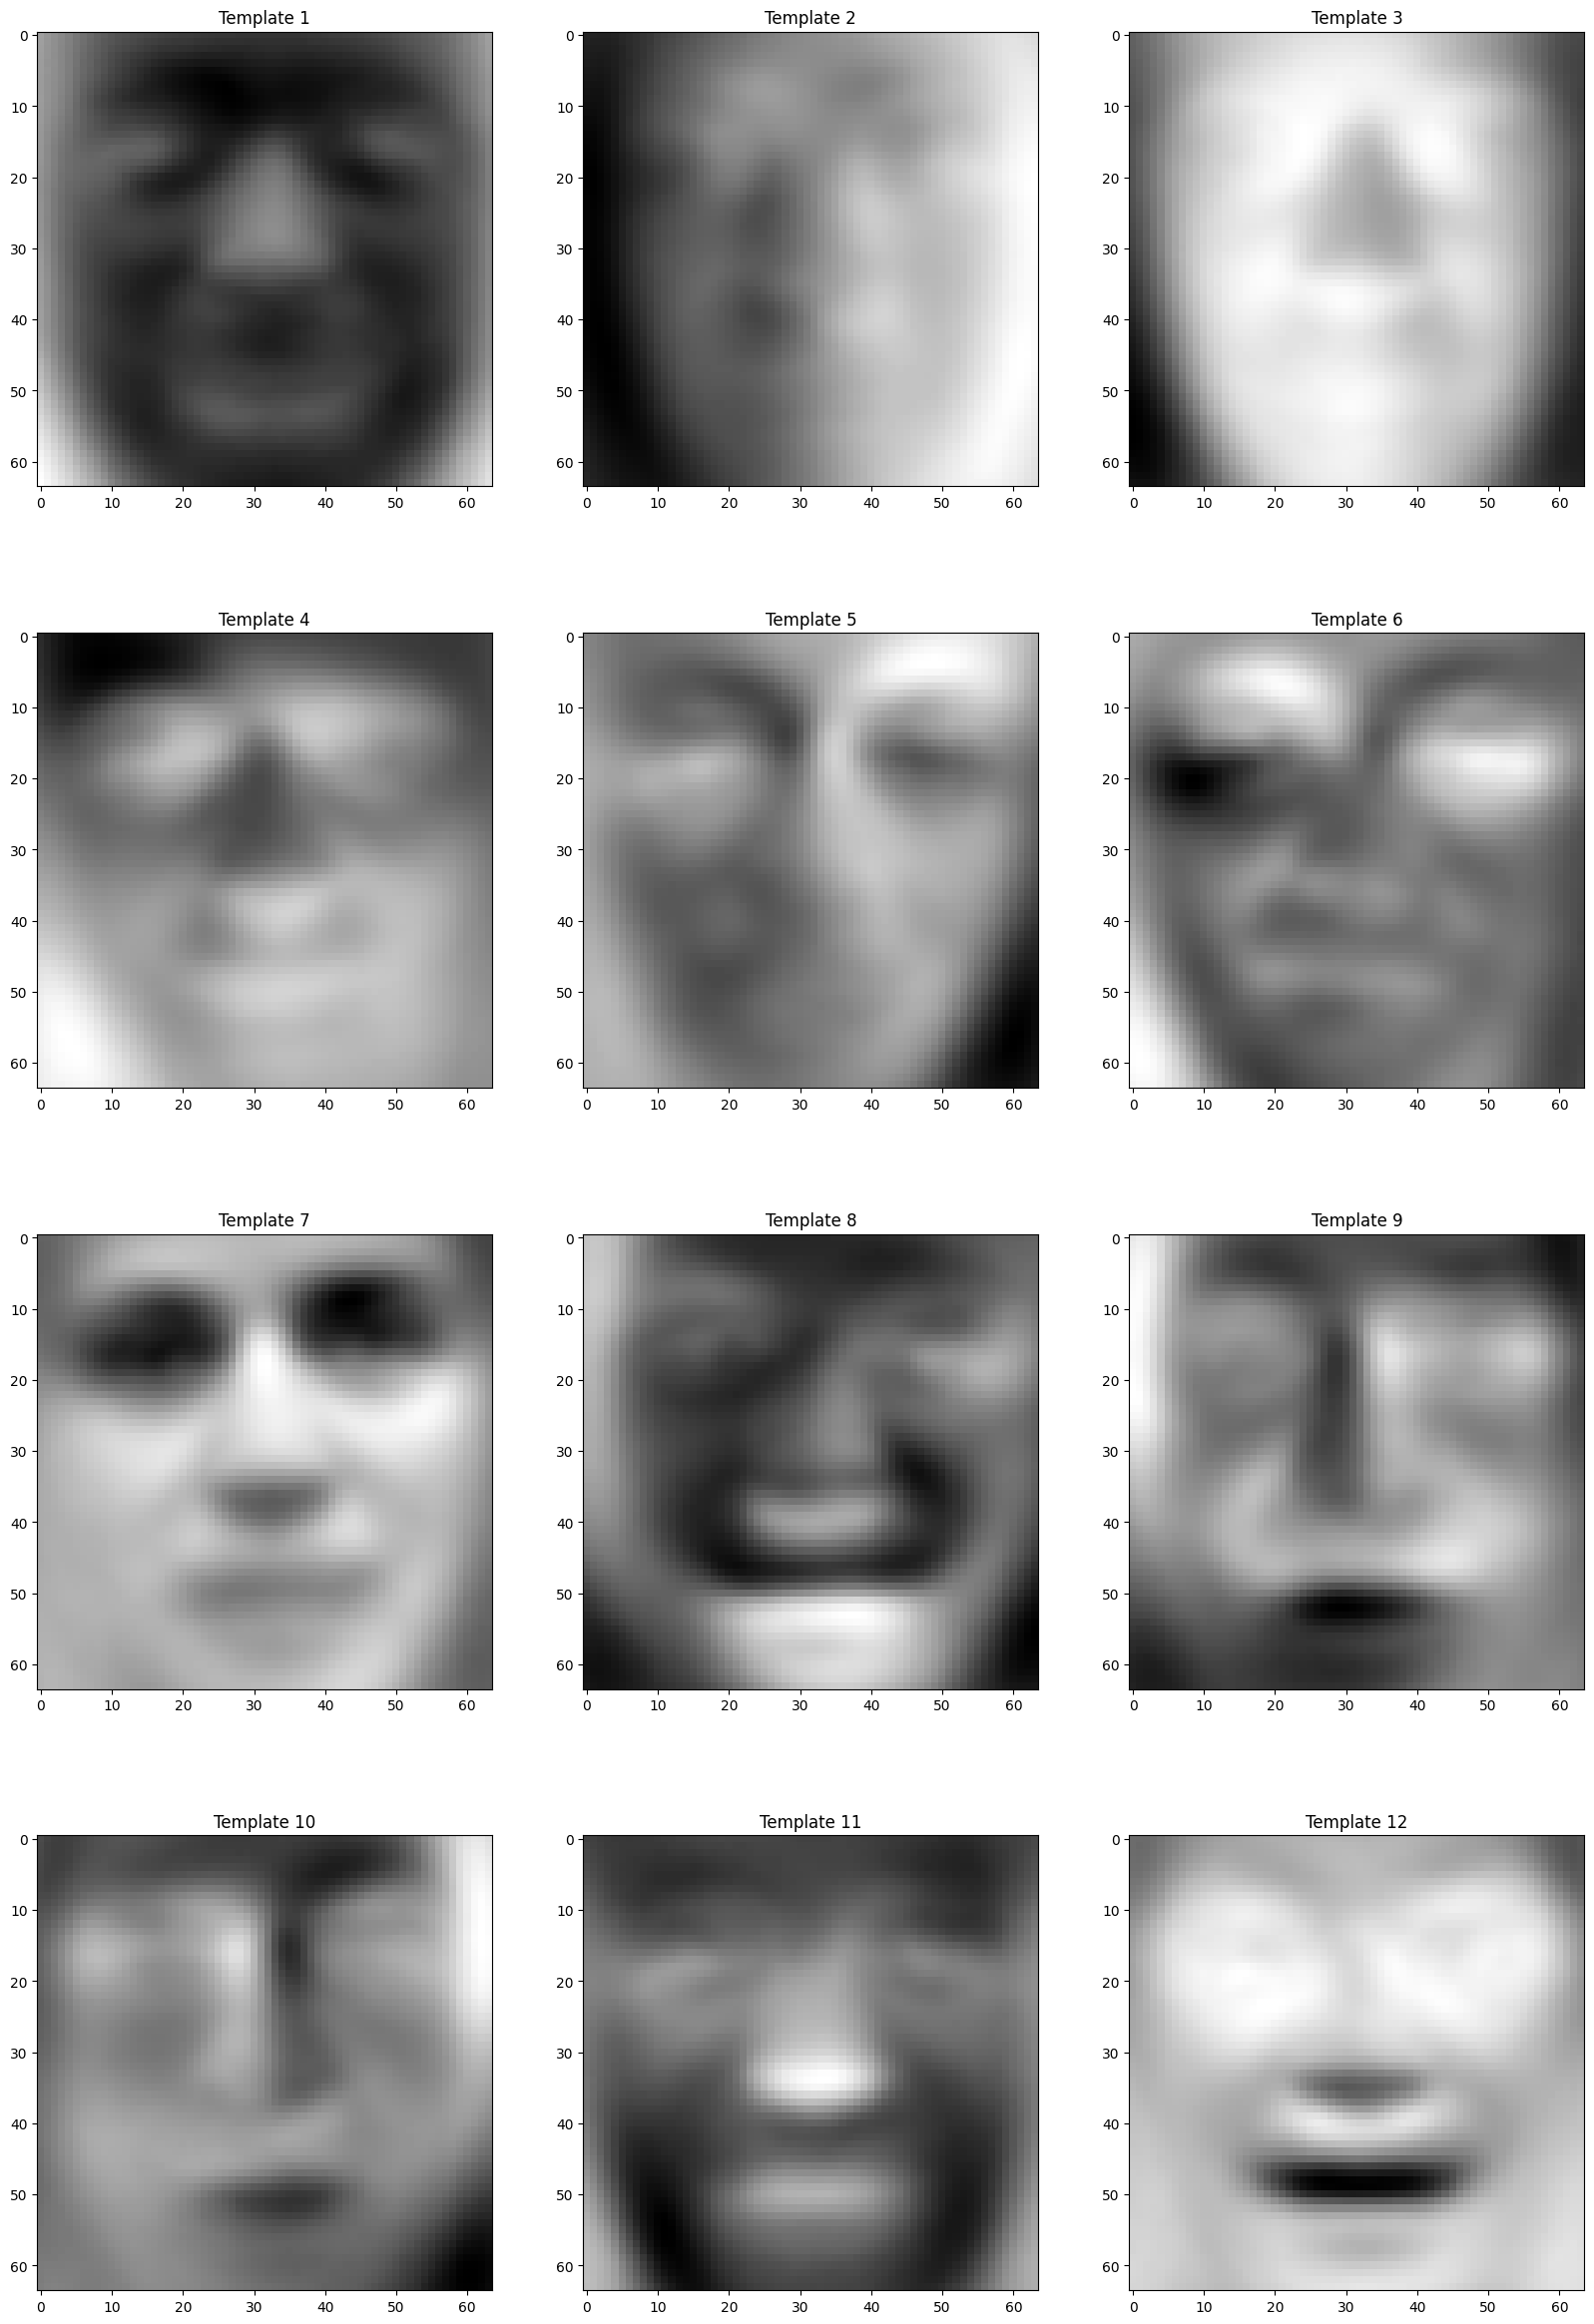

In [6]:
EigenFaces = Ureduce.reshape(64, 64, K) #Eigenfaces = Eigen + Faces.  Eigenvector = vector propio (forman un espacio vectorial)

plt.figure(figsize=(20, 30))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.imshow(EigenFaces[:,:,i], 'gray')
    plt.title('Template {}'.format(i+1))

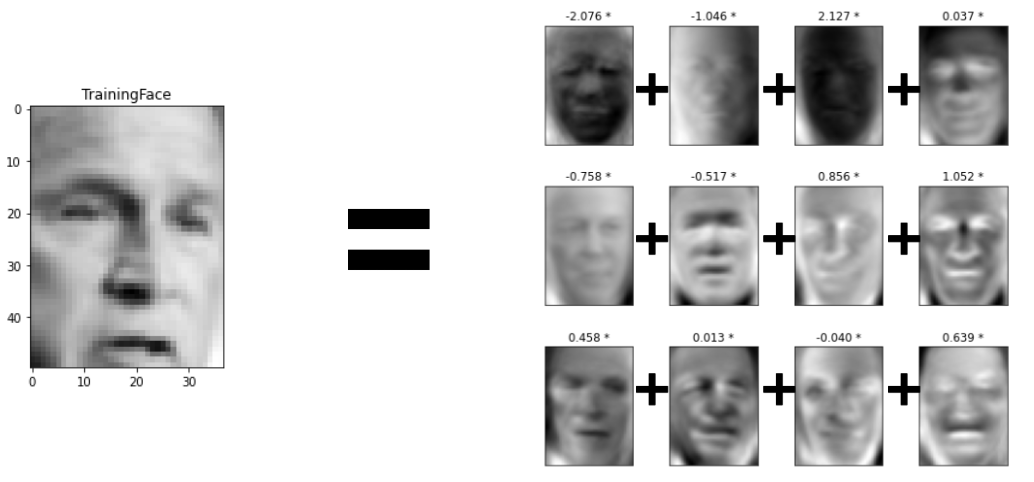

# 5.Reconstrucción de imagenes de rostros

Label Chanda_Rubin_0005.pgm


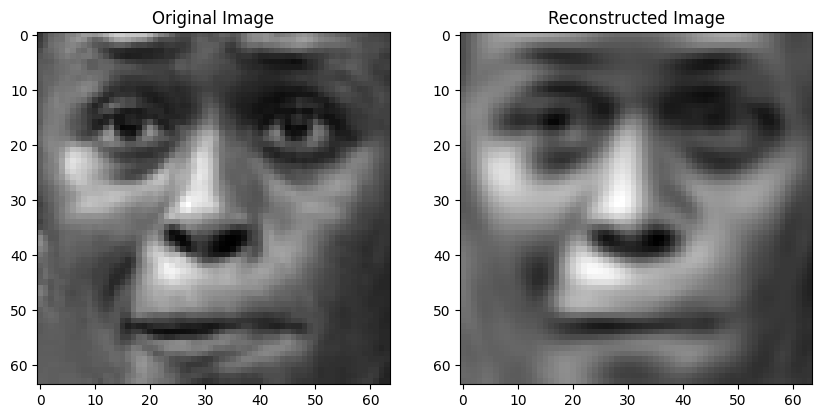

In [7]:
import random
random.seed(a=877)

#Implementa x_approx = Ureduce*z
X_approx = pca.inverse_transform(z) #transformada KL

# índice de la imagen a graficar
index = random.randint(0,13233)
reconstructed_image = X_approx[index]
reconstructed_image = reconstructed_image.reshape(64, 64)

print('Label {}'.format(filenames[index]))
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(images[index], 'gray')

plt.subplot(1, 2, 2)
plt.title('Reconstructed Image')
plt.imshow(reconstructed_image, 'gray')

# 6.Actividades 
Todas las actividades tienen el mismo puntaje

## 6.1 Varianza retenida vs número de componentes

Grafique la varianza retenida en función del número de componentes principales retenidos k. Para esto, modifique la variable `explained_variance` con los siguientes valores: 0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7. 
Para cada valor, verifique el número de componentes principales retenidos k.

#### 0.99

In [8]:
explained_variance = 0.99 #varianza retenida =  varianza explicada = "información" retenida
pca = PCA(explained_variance) #solo construyo el objeto pca
pca.fit(X) #Implementa [U, S, V] = svd(Sigma); Ureduce = U(:,1:k) (ver diapositvas). Selecciona automáticamente k de modo que se retenga 99% de la varianza . Fit solo se hace en el training set.
#puede demorar unos minutos

z = pca.transform(X) # Implementa z = Ureduce'*x (ver diapositivas). En algebra lineal Ureduce o U son matrices de rotación. ESTA ES LA PARTE DE PROYECCIÓN
Ureduce = pca.components_.T #Ureduce nxk
K = pca.n_components_ #número de componentes correspondientes a la varianza retenida
print("Los datos originales tienen dimensión", X.shape)
print("Los datos comprimidos tienen dimensión", z.shape)
print("El número de componentes principales K es", K, " que retienen el ", explained_variance*100, "% de la varianza")
print("El tam. de Ureduce (matriz de eigenvectors) es", Ureduce.shape)
print("PCA consigue reducir el tamaño en disco al ", K/n*100, "% de su tam. original")

Los datos originales tienen dimensión (13233, 4096)
Los datos comprimidos tienen dimensión (13233, 577)
El número de componentes principales K es 577  que retienen el  99.0 % de la varianza
El tam. de Ureduce (matriz de eigenvectors) es (4096, 577)
PCA consigue reducir el tamaño en disco al  14.0869140625 % de su tam. original


#### 0.95

In [9]:
explained_variance = 0.95 #varianza retenida =  varianza explicada = "información" retenida
pca = PCA(explained_variance) #solo construyo el objeto pca
pca.fit(X) #Implementa [U, S, V] = svd(Sigma); Ureduce = U(:,1:k) (ver diapositvas). Selecciona automáticamente k de modo que se retenga 99% de la varianza . Fit solo se hace en el training set.
#puede demorar unos minutos

z = pca.transform(X) # Implementa z = Ureduce'*x (ver diapositivas). En algebra lineal Ureduce o U son matrices de rotación. ESTA ES LA PARTE DE PROYECCIÓN
Ureduce = pca.components_.T #Ureduce nxk
K = pca.n_components_ #número de componentes correspondientes a la varianza retenida
print("Los datos originales tienen dimensión", X.shape)
print("Los datos comprimidos tienen dimensión", z.shape)
print("El número de componentes principales K es", K, " que retienen el ", explained_variance*100, "% de la varianza")
print("El tam. de Ureduce (matriz de eigenvectors) es", Ureduce.shape)
print("PCA consigue reducir el tamaño en disco al ", K/n*100, "% de su tam. original")

Los datos originales tienen dimensión (13233, 4096)
Los datos comprimidos tienen dimensión (13233, 180)
El número de componentes principales K es 180  que retienen el  95.0 % de la varianza
El tam. de Ureduce (matriz de eigenvectors) es (4096, 180)
PCA consigue reducir el tamaño en disco al  4.39453125 % de su tam. original


#### 0.9

In [10]:
explained_variance = 0.90 #varianza retenida =  varianza explicada = "información" retenida
pca = PCA(explained_variance) #solo construyo el objeto pca
pca.fit(X) #Implementa [U, S, V] = svd(Sigma); Ureduce = U(:,1:k) (ver diapositvas). Selecciona automáticamente k de modo que se retenga 99% de la varianza . Fit solo se hace en el training set.
#puede demorar unos minutos

z = pca.transform(X) # Implementa z = Ureduce'*x (ver diapositivas). En algebra lineal Ureduce o U son matrices de rotación. ESTA ES LA PARTE DE PROYECCIÓN
Ureduce = pca.components_.T #Ureduce nxk
K = pca.n_components_ #número de componentes correspondientes a la varianza retenida
print("Los datos originales tienen dimensión", X.shape)
print("Los datos comprimidos tienen dimensión", z.shape)
print("El número de componentes principales K es", K, " que retienen el ", explained_variance*100, "% de la varianza")
print("El tam. de Ureduce (matriz de eigenvectors) es", Ureduce.shape)
print("PCA consigue reducir el tamaño en disco al ", K/n*100, "% de su tam. original")

Los datos originales tienen dimensión (13233, 4096)
Los datos comprimidos tienen dimensión (13233, 87)
El número de componentes principales K es 87  que retienen el  90.0 % de la varianza
El tam. de Ureduce (matriz de eigenvectors) es (4096, 87)
PCA consigue reducir el tamaño en disco al  2.1240234375 % de su tam. original


#### 0.85

In [11]:
explained_variance = 0.85 #varianza retenida =  varianza explicada = "información" retenida
pca = PCA(explained_variance) #solo construyo el objeto pca
pca.fit(X) #Implementa [U, S, V] = svd(Sigma); Ureduce = U(:,1:k) (ver diapositvas). Selecciona automáticamente k de modo que se retenga 99% de la varianza . Fit solo se hace en el training set.
#puede demorar unos minutos

z = pca.transform(X) # Implementa z = Ureduce'*x (ver diapositivas). En algebra lineal Ureduce o U son matrices de rotación. ESTA ES LA PARTE DE PROYECCIÓN
Ureduce = pca.components_.T #Ureduce nxk
K = pca.n_components_ #número de componentes correspondientes a la varianza retenida
print("Los datos originales tienen dimensión", X.shape)
print("Los datos comprimidos tienen dimensión", z.shape)
print("El número de componentes principales K es", K, " que retienen el ", explained_variance*100, "% de la varianza")
print("El tam. de Ureduce (matriz de eigenvectors) es", Ureduce.shape)
print("PCA consigue reducir el tamaño en disco al ", K/n*100, "% de su tam. original")

Los datos originales tienen dimensión (13233, 4096)
Los datos comprimidos tienen dimensión (13233, 52)
El número de componentes principales K es 52  que retienen el  85.0 % de la varianza
El tam. de Ureduce (matriz de eigenvectors) es (4096, 52)
PCA consigue reducir el tamaño en disco al  1.26953125 % de su tam. original


#### 0.80


In [12]:
explained_variance = 0.80 #varianza retenida =  varianza explicada = "información" retenida
pca = PCA(explained_variance) #solo construyo el objeto pca
pca.fit(X) #Implementa [U, S, V] = svd(Sigma); Ureduce = U(:,1:k) (ver diapositvas). Selecciona automáticamente k de modo que se retenga 99% de la varianza . Fit solo se hace en el training set.
#puede demorar unos minutos

z = pca.transform(X) # Implementa z = Ureduce'*x (ver diapositivas). En algebra lineal Ureduce o U son matrices de rotación. ESTA ES LA PARTE DE PROYECCIÓN
Ureduce = pca.components_.T #Ureduce nxk
K = pca.n_components_ #número de componentes correspondientes a la varianza retenida
print("Los datos originales tienen dimensión", X.shape)
print("Los datos comprimidos tienen dimensión", z.shape)
print("El número de componentes principales K es", K, " que retienen el ", explained_variance*100, "% de la varianza")
print("El tam. de Ureduce (matriz de eigenvectors) es", Ureduce.shape)
print("PCA consigue reducir el tamaño en disco al ", K/n*100, "% de su tam. original")

Los datos originales tienen dimensión (13233, 4096)
Los datos comprimidos tienen dimensión (13233, 33)
El número de componentes principales K es 33  que retienen el  80.0 % de la varianza
El tam. de Ureduce (matriz de eigenvectors) es (4096, 33)
PCA consigue reducir el tamaño en disco al  0.8056640625 % de su tam. original


#### 0.75

In [13]:
explained_variance = 0.75 #varianza retenida =  varianza explicada = "información" retenida
pca = PCA(explained_variance) #solo construyo el objeto pca
pca.fit(X) #Implementa [U, S, V] = svd(Sigma); Ureduce = U(:,1:k) (ver diapositvas). Selecciona automáticamente k de modo que se retenga 99% de la varianza . Fit solo se hace en el training set.
#puede demorar unos minutos

z = pca.transform(X) # Implementa z = Ureduce'*x (ver diapositivas). En algebra lineal Ureduce o U son matrices de rotación. ESTA ES LA PARTE DE PROYECCIÓN
Ureduce = pca.components_.T #Ureduce nxk
K = pca.n_components_ #número de componentes correspondientes a la varianza retenida
print("Los datos originales tienen dimensión", X.shape)
print("Los datos comprimidos tienen dimensión", z.shape)
print("El número de componentes principales K es", K, " que retienen el ", explained_variance*100, "% de la varianza")
print("El tam. de Ureduce (matriz de eigenvectors) es", Ureduce.shape)
print("PCA consigue reducir el tamaño en disco al ", K/n*100, "% de su tam. original")

Los datos originales tienen dimensión (13233, 4096)
Los datos comprimidos tienen dimensión (13233, 22)
El número de componentes principales K es 22  que retienen el  75.0 % de la varianza
El tam. de Ureduce (matriz de eigenvectors) es (4096, 22)
PCA consigue reducir el tamaño en disco al  0.537109375 % de su tam. original


#### 0.70

In [14]:
explained_variance = 0.70 #varianza retenida =  varianza explicada = "información" retenida
pca = PCA(explained_variance) #solo construyo el objeto pca
pca.fit(X) #Implementa [U, S, V] = svd(Sigma); Ureduce = U(:,1:k) (ver diapositvas). Selecciona automáticamente k de modo que se retenga 99% de la varianza . Fit solo se hace en el training set.
#puede demorar unos minutos

z = pca.transform(X) # Implementa z = Ureduce'*x (ver diapositivas). En algebra lineal Ureduce o U son matrices de rotación. ESTA ES LA PARTE DE PROYECCIÓN
Ureduce = pca.components_.T #Ureduce nxk
K = pca.n_components_ #número de componentes correspondientes a la varianza retenida
print("Los datos originales tienen dimensión", X.shape)
print("Los datos comprimidos tienen dimensión", z.shape)
print("El número de componentes principales K es", K, " que retienen el ", explained_variance*100, "% de la varianza")
print("El tam. de Ureduce (matriz de eigenvectors) es", Ureduce.shape)
print("PCA consigue reducir el tamaño en disco al ", K/n*100, "% de su tam. original")

Los datos originales tienen dimensión (13233, 4096)
Los datos comprimidos tienen dimensión (13233, 15)
El número de componentes principales K es 15  que retienen el  70.0 % de la varianza
El tam. de Ureduce (matriz de eigenvectors) es (4096, 15)
PCA consigue reducir el tamaño en disco al  0.3662109375 % de su tam. original


## 6.2 Compresión y calidad de la imagen

Grafique el porcentaje de compresión dado por k/n en función del número de componentes retenidos k. Para esto, modifique la variable `explained_variance` con los siguientes valores: 0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7.  Para cada valor, verifique el número de componentes princiaples retenidos k.

Por otro lado, para cada valor de k, grafique un rostro para ver la pérdida de calidad a medida que el número de componentes k disminuye.




In [19]:
def before_afterPCA(pca):
    #Implementa x_approx = Ureduce*z
    X_approx = pca.inverse_transform(z) #transformada KL

    # índice de la imagen a graficar
    index = 0
    reconstructed_image = X_approx[index]
    reconstructed_image = reconstructed_image.reshape(64, 64)

    print('Label {}'.format(filenames[index]))
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(images[index], 'gray')

    plt.subplot(1, 2, 2)
    plt.title('Reconstructed Image')
    plt.imshow(reconstructed_image, 'gray')

#### 0.99

Los datos originales tienen dimensión (13233, 4096)
Los datos comprimidos tienen dimensión (13233, 577)
El número de componentes principales K es 577  que retienen el  99.0 % de la varianza
El tam. de Ureduce (matriz de eigenvectors) es (4096, 577)
PCA consigue reducir el tamaño en disco al  14.0869140625 % de su tam. original
Label Lesley_McCulloch_0001.pgm


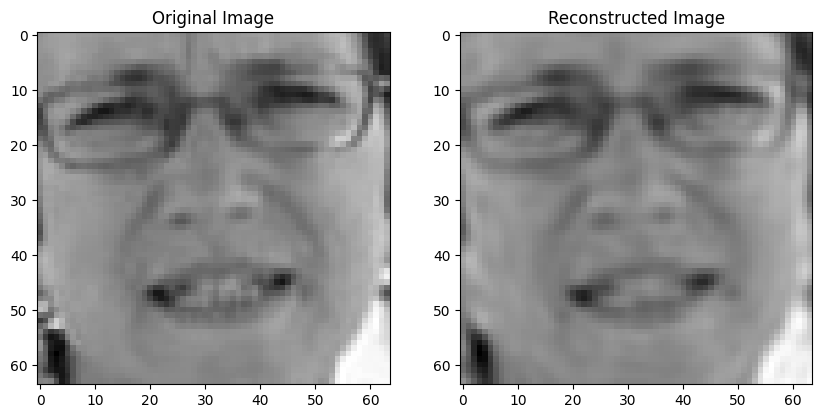

In [20]:
explained_variance = 0.99 #varianza retenida =  varianza explicada = "información" retenida
pca = PCA(explained_variance) #solo construyo el objeto pca
pca.fit(X) #Implementa [U, S, V] = svd(Sigma); Ureduce = U(:,1:k) (ver diapositvas). Selecciona automáticamente k de modo que se retenga 99% de la varianza . Fit solo se hace en el training set.
#puede demorar unos minutos

z = pca.transform(X) # Implementa z = Ureduce'*x (ver diapositivas). En algebra lineal Ureduce o U son matrices de rotación. ESTA ES LA PARTE DE PROYECCIÓN
Ureduce = pca.components_.T #Ureduce nxk
K = pca.n_components_ #número de componentes correspondientes a la varianza retenida
print("Los datos originales tienen dimensión", X.shape)
print("Los datos comprimidos tienen dimensión", z.shape)
print("El número de componentes principales K es", K, " que retienen el ", explained_variance*100, "% de la varianza")
print("El tam. de Ureduce (matriz de eigenvectors) es", Ureduce.shape)
print("PCA consigue reducir el tamaño en disco al ", K/n*100, "% de su tam. original")

before_afterPCA(pca)



#### 0.95

Los datos originales tienen dimensión (13233, 4096)
Los datos comprimidos tienen dimensión (13233, 180)
El número de componentes principales K es 180  que retienen el  95.0 % de la varianza
El tam. de Ureduce (matriz de eigenvectors) es (4096, 180)
PCA consigue reducir el tamaño en disco al  4.39453125 % de su tam. original
Label Lesley_McCulloch_0001.pgm


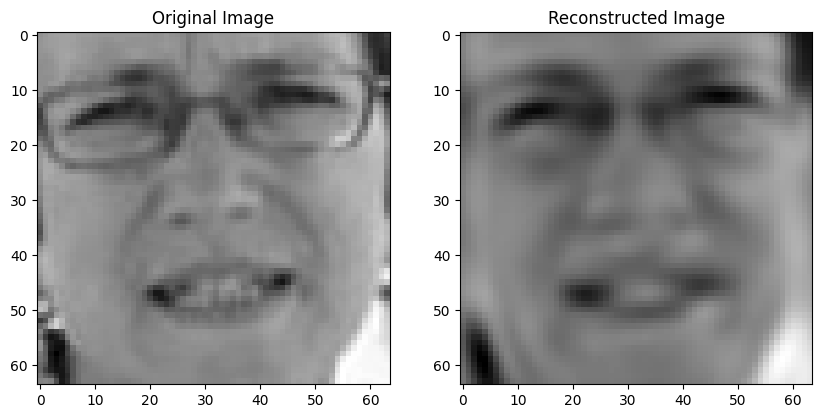

In [21]:
explained_variance = 0.95 #varianza retenida =  varianza explicada = "información" retenida
pca = PCA(explained_variance) #solo construyo el objeto pca
pca.fit(X) #Implementa [U, S, V] = svd(Sigma); Ureduce = U(:,1:k) (ver diapositvas). Selecciona automáticamente k de modo que se retenga 99% de la varianza . Fit solo se hace en el training set.
#puede demorar unos minutos

z = pca.transform(X) # Implementa z = Ureduce'*x (ver diapositivas). En algebra lineal Ureduce o U son matrices de rotación. ESTA ES LA PARTE DE PROYECCIÓN
Ureduce = pca.components_.T #Ureduce nxk
K = pca.n_components_ #número de componentes correspondientes a la varianza retenida
print("Los datos originales tienen dimensión", X.shape)
print("Los datos comprimidos tienen dimensión", z.shape)
print("El número de componentes principales K es", K, " que retienen el ", explained_variance*100, "% de la varianza")
print("El tam. de Ureduce (matriz de eigenvectors) es", Ureduce.shape)
print("PCA consigue reducir el tamaño en disco al ", K/n*100, "% de su tam. original")

before_afterPCA(pca)

#### 0.90

Los datos originales tienen dimensión (13233, 4096)
Los datos comprimidos tienen dimensión (13233, 87)
El número de componentes principales K es 87  que retienen el  90.0 % de la varianza
El tam. de Ureduce (matriz de eigenvectors) es (4096, 87)
PCA consigue reducir el tamaño en disco al  2.1240234375 % de su tam. original
Label Lesley_McCulloch_0001.pgm


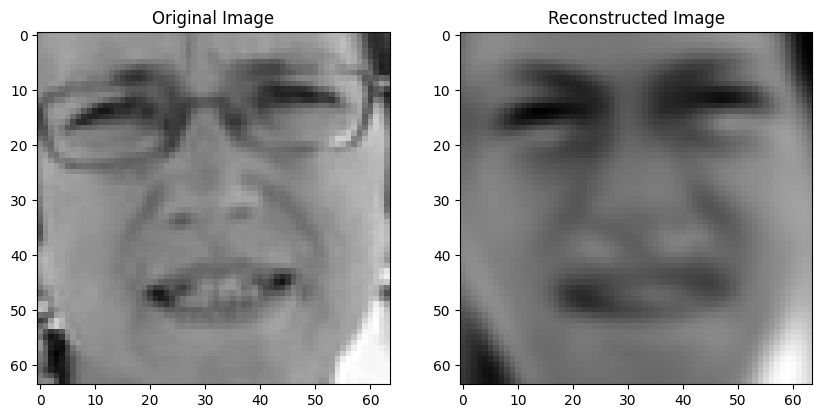

In [23]:
explained_variance = 0.90 #varianza retenida =  varianza explicada = "información" retenida
pca = PCA(explained_variance) #solo construyo el objeto pca
pca.fit(X) #Implementa [U, S, V] = svd(Sigma); Ureduce = U(:,1:k) (ver diapositvas). Selecciona automáticamente k de modo que se retenga 99% de la varianza . Fit solo se hace en el training set.
#puede demorar unos minutos

z = pca.transform(X) # Implementa z = Ureduce'*x (ver diapositivas). En algebra lineal Ureduce o U son matrices de rotación. ESTA ES LA PARTE DE PROYECCIÓN
Ureduce = pca.components_.T #Ureduce nxk
K = pca.n_components_ #número de componentes correspondientes a la varianza retenida
print("Los datos originales tienen dimensión", X.shape)
print("Los datos comprimidos tienen dimensión", z.shape)
print("El número de componentes principales K es", K, " que retienen el ", explained_variance*100, "% de la varianza")
print("El tam. de Ureduce (matriz de eigenvectors) es", Ureduce.shape)
print("PCA consigue reducir el tamaño en disco al ", K/n*100, "% de su tam. original")

before_afterPCA(pca)

#### 0.85

Los datos originales tienen dimensión (13233, 4096)
Los datos comprimidos tienen dimensión (13233, 52)
El número de componentes principales K es 52  que retienen el  85.0 % de la varianza
El tam. de Ureduce (matriz de eigenvectors) es (4096, 52)
PCA consigue reducir el tamaño en disco al  1.26953125 % de su tam. original
Label Lesley_McCulloch_0001.pgm


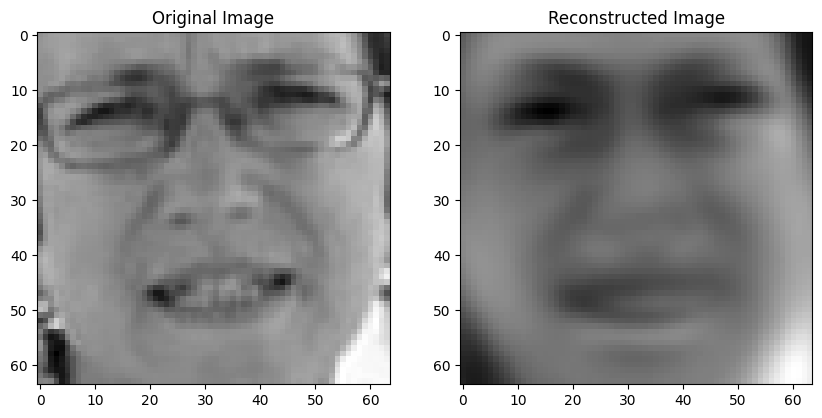

In [24]:
explained_variance = 0.85 #varianza retenida =  varianza explicada = "información" retenida
pca = PCA(explained_variance) #solo construyo el objeto pca
pca.fit(X) #Implementa [U, S, V] = svd(Sigma); Ureduce = U(:,1:k) (ver diapositvas). Selecciona automáticamente k de modo que se retenga 99% de la varianza . Fit solo se hace en el training set.
#puede demorar unos minutos

z = pca.transform(X) # Implementa z = Ureduce'*x (ver diapositivas). En algebra lineal Ureduce o U son matrices de rotación. ESTA ES LA PARTE DE PROYECCIÓN
Ureduce = pca.components_.T #Ureduce nxk
K = pca.n_components_ #número de componentes correspondientes a la varianza retenida
print("Los datos originales tienen dimensión", X.shape)
print("Los datos comprimidos tienen dimensión", z.shape)
print("El número de componentes principales K es", K, " que retienen el ", explained_variance*100, "% de la varianza")
print("El tam. de Ureduce (matriz de eigenvectors) es", Ureduce.shape)
print("PCA consigue reducir el tamaño en disco al ", K/n*100, "% de su tam. original")

before_afterPCA(pca)

#### 0.80

Los datos originales tienen dimensión (13233, 4096)
Los datos comprimidos tienen dimensión (13233, 33)
El número de componentes principales K es 33  que retienen el  80.0 % de la varianza
El tam. de Ureduce (matriz de eigenvectors) es (4096, 33)
PCA consigue reducir el tamaño en disco al  0.8056640625 % de su tam. original
Label Lesley_McCulloch_0001.pgm


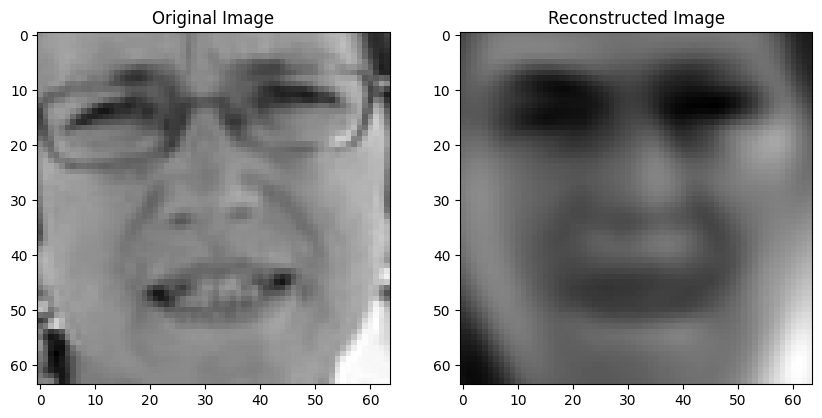

In [25]:
explained_variance = 0.80 #varianza retenida =  varianza explicada = "información" retenida
pca = PCA(explained_variance) #solo construyo el objeto pca
pca.fit(X) #Implementa [U, S, V] = svd(Sigma); Ureduce = U(:,1:k) (ver diapositvas). Selecciona automáticamente k de modo que se retenga 99% de la varianza . Fit solo se hace en el training set.
#puede demorar unos minutos

z = pca.transform(X) # Implementa z = Ureduce'*x (ver diapositivas). En algebra lineal Ureduce o U son matrices de rotación. ESTA ES LA PARTE DE PROYECCIÓN
Ureduce = pca.components_.T #Ureduce nxk
K = pca.n_components_ #número de componentes correspondientes a la varianza retenida
print("Los datos originales tienen dimensión", X.shape)
print("Los datos comprimidos tienen dimensión", z.shape)
print("El número de componentes principales K es", K, " que retienen el ", explained_variance*100, "% de la varianza")
print("El tam. de Ureduce (matriz de eigenvectors) es", Ureduce.shape)
print("PCA consigue reducir el tamaño en disco al ", K/n*100, "% de su tam. original")

before_afterPCA(pca)

#### 0.75

Los datos originales tienen dimensión (13233, 4096)
Los datos comprimidos tienen dimensión (13233, 22)
El número de componentes principales K es 22  que retienen el  75.0 % de la varianza
El tam. de Ureduce (matriz de eigenvectors) es (4096, 22)
PCA consigue reducir el tamaño en disco al  0.537109375 % de su tam. original
Label Lesley_McCulloch_0001.pgm


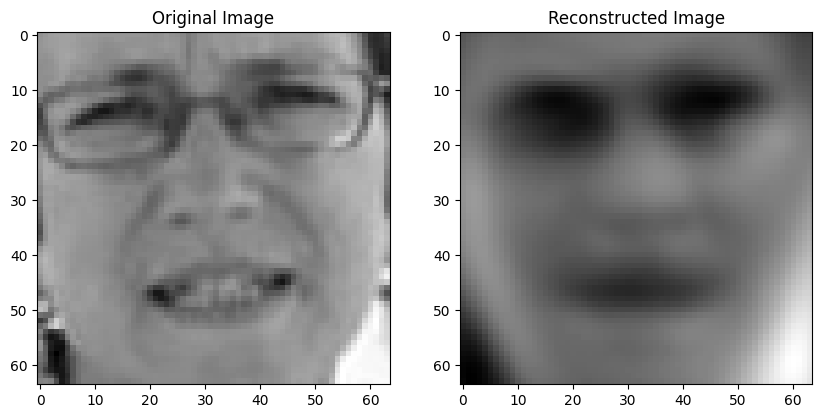

In [26]:
explained_variance = 0.75 #varianza retenida =  varianza explicada = "información" retenida
pca = PCA(explained_variance) #solo construyo el objeto pca
pca.fit(X) #Implementa [U, S, V] = svd(Sigma); Ureduce = U(:,1:k) (ver diapositvas). Selecciona automáticamente k de modo que se retenga 99% de la varianza . Fit solo se hace en el training set.
#puede demorar unos minutos

z = pca.transform(X) # Implementa z = Ureduce'*x (ver diapositivas). En algebra lineal Ureduce o U son matrices de rotación. ESTA ES LA PARTE DE PROYECCIÓN
Ureduce = pca.components_.T #Ureduce nxk
K = pca.n_components_ #número de componentes correspondientes a la varianza retenida
print("Los datos originales tienen dimensión", X.shape)
print("Los datos comprimidos tienen dimensión", z.shape)
print("El número de componentes principales K es", K, " que retienen el ", explained_variance*100, "% de la varianza")
print("El tam. de Ureduce (matriz de eigenvectors) es", Ureduce.shape)
print("PCA consigue reducir el tamaño en disco al ", K/n*100, "% de su tam. original")

before_afterPCA(pca)

#### 0.70

Los datos originales tienen dimensión (13233, 4096)
Los datos comprimidos tienen dimensión (13233, 15)
El número de componentes principales K es 15  que retienen el  70.0 % de la varianza
El tam. de Ureduce (matriz de eigenvectors) es (4096, 15)
PCA consigue reducir el tamaño en disco al  0.3662109375 % de su tam. original
Label Lesley_McCulloch_0001.pgm


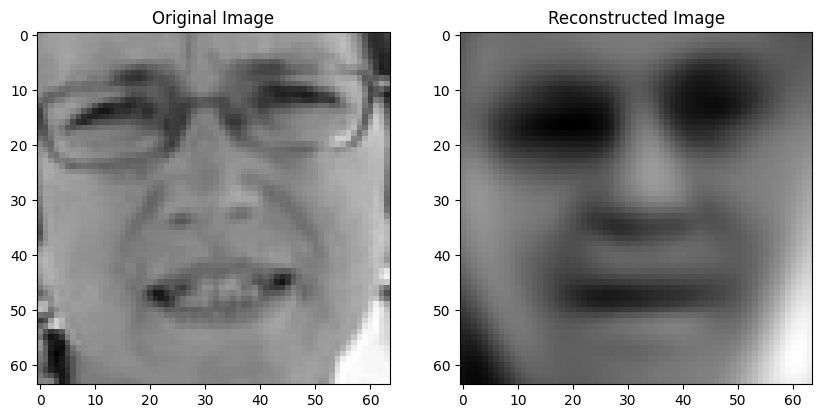

In [27]:
explained_variance = 0.70 #varianza retenida =  varianza explicada = "información" retenida
pca = PCA(explained_variance) #solo construyo el objeto pca
pca.fit(X) #Implementa [U, S, V] = svd(Sigma); Ureduce = U(:,1:k) (ver diapositvas). Selecciona automáticamente k de modo que se retenga 99% de la varianza . Fit solo se hace en el training set.
#puede demorar unos minutos

z = pca.transform(X) # Implementa z = Ureduce'*x (ver diapositivas). En algebra lineal Ureduce o U son matrices de rotación. ESTA ES LA PARTE DE PROYECCIÓN
Ureduce = pca.components_.T #Ureduce nxk
K = pca.n_components_ #número de componentes correspondientes a la varianza retenida
print("Los datos originales tienen dimensión", X.shape)
print("Los datos comprimidos tienen dimensión", z.shape)
print("El número de componentes principales K es", K, " que retienen el ", explained_variance*100, "% de la varianza")
print("El tam. de Ureduce (matriz de eigenvectors) es", Ureduce.shape)
print("PCA consigue reducir el tamaño en disco al ", K/n*100, "% de su tam. original")

before_afterPCA(pca)

## 6.3 Proyectar mi rostro en los Eigenfaces

Tomar una imagen suya y "proyectarla" (transformarla) en los Eigenfaces. Recuerde que su rostro debe estar escalada a 64x64 pixeles y en formato pgm. No se olvide de realizar el reshape a 4096. Luego, reconstruir su imagen y graficar la original junto con la reconstruida. Para este apartado, retener 99% de la varianza

In [17]:
#AQUÍ SU CÓDIGO

## 6.4 Conclusiones

Concluya aquí su trabajo.